In [6]:
import pandas as pd

In [7]:
deliveries_df = pd.read_csv("./data/innings_deliveries.csv")
print(deliveries_df)

                            team  over         batter          bowler  \
0    Royal Challengers Bengaluru     0        V Kohli        I Sharma   
1    Royal Challengers Bengaluru     0        V Kohli        I Sharma   
2    Royal Challengers Bengaluru     0   F du Plessis        I Sharma   
3    Royal Challengers Bengaluru     0        V Kohli        I Sharma   
4    Royal Challengers Bengaluru     0        V Kohli        I Sharma   
..                           ...   ...            ...             ...   
242               Delhi Capitals    18  Kuldeep Yadav  Mohammed Siraj   
243               Delhi Capitals    18       I Sharma  Mohammed Siraj   
244               Delhi Capitals    18       I Sharma  Mohammed Siraj   
245               Delhi Capitals    18       I Sharma  Mohammed Siraj   
246               Delhi Capitals    19  Kuldeep Yadav      Yash Dayal   

       non_striker  runs_batter  runs_extras  runs_total     player_out  \
0     F du Plessis            0            0    

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Run Distribution for each Over

In [9]:
run_distribution = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()


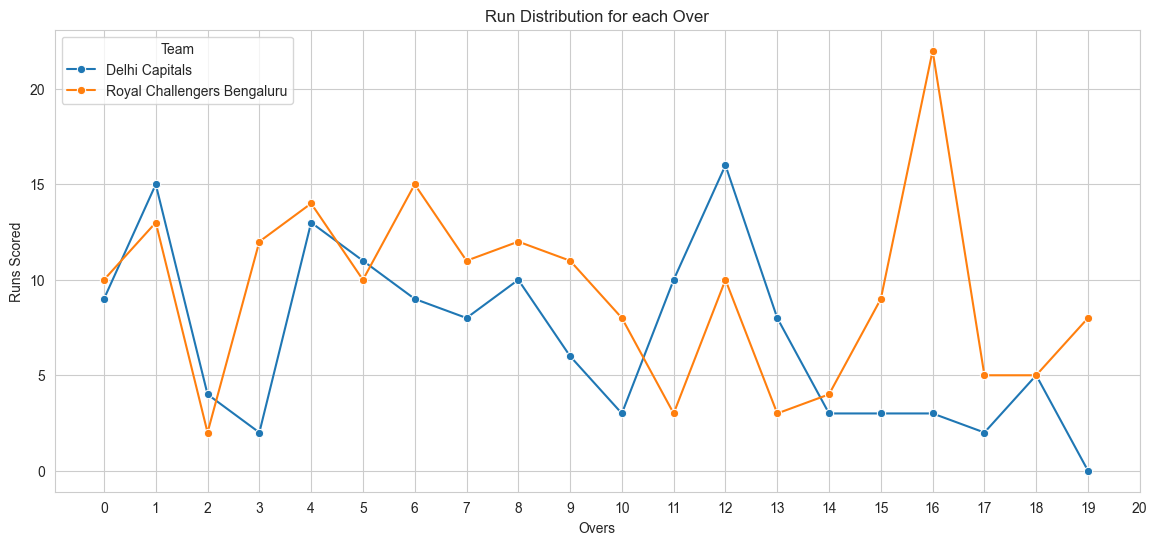

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution for each Over')
plt.xlabel('Overs')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  
plt.legend(title='Team')
plt.show()

Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

## Top Scorers of the match

In [11]:
top_scorers = deliveries_df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

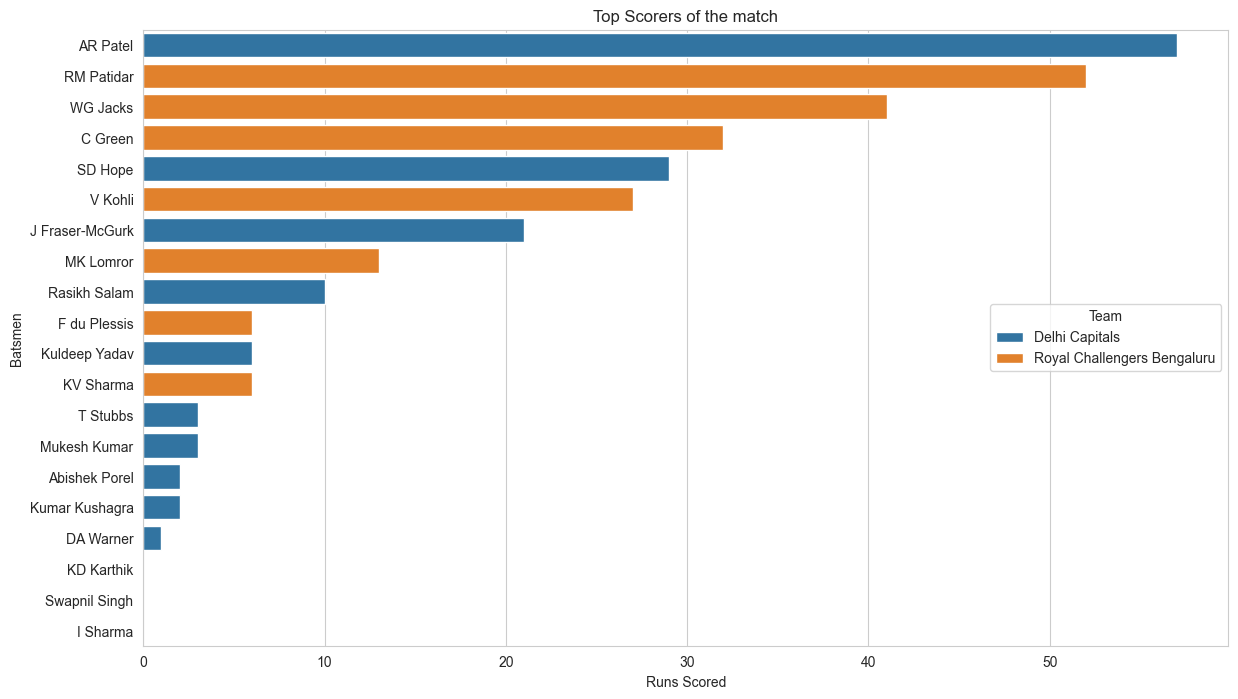

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers of the match')
plt.xlabel('Runs Scored')
plt.ylabel('Batsmen')
plt.legend(title='Team', loc='center right')
plt.show()

* AR Patel from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
* RM Patidar is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.

## Batsmen Strike Rate 

In [13]:
batter_stats = deliveries_df.groupby('batter').agg({
    'runs_batter': 'sum', 
    'over': 'count'
}).rename(columns={'over': 'balls_faced'}).reset_index()

batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


* J Fraser-McGurk had the highest strike rate at 262.50, scoring 21 runs from just 8 balls.
* Virat Kohli also scored efficiently, with a strike rate of 192.86, making 27 runs from 14 balls.
* Rajat Patidar contributed significantly with a strike rate of 152.94, accumulating 52 runs from 34 balls.

## Batting Partnerships

In [14]:
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

In [15]:
partnerships_data = calculate_partnerships(deliveries_df)
partnerships_df = pd.DataFrame(partnerships_data)

In [16]:
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

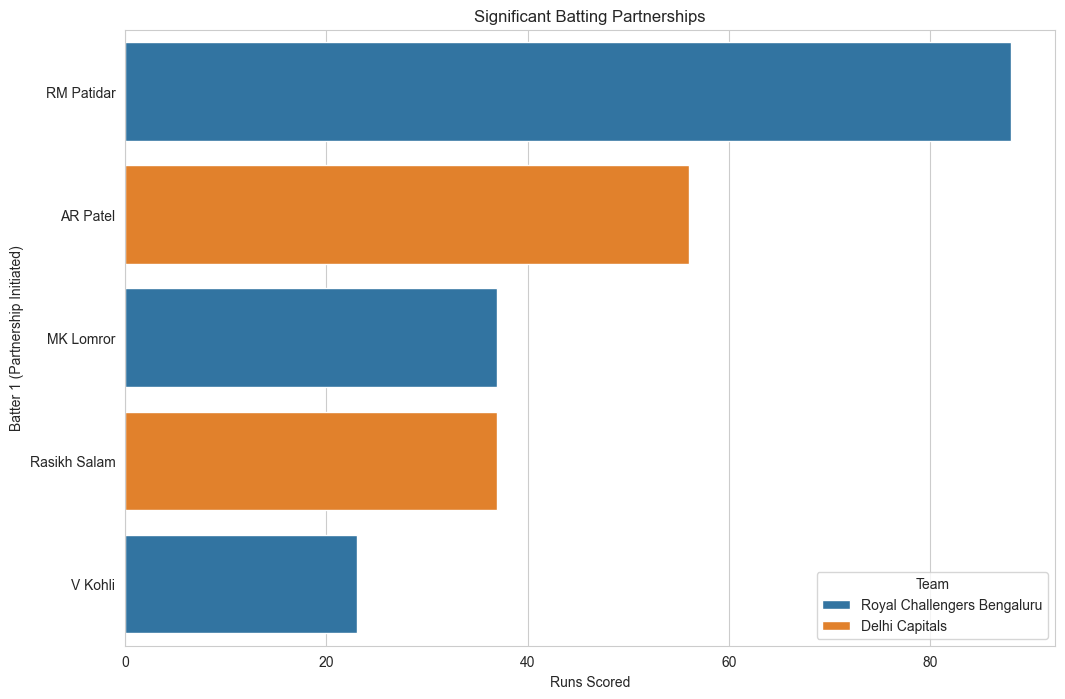

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

* The bar chart displays significant batting partnerships from the match, highlighting partnerships that scored more than 20 runs.
* It provides insights into which players were involved in pivotal stands, which can help in assessing player form and team strategy.

## Top Bowlers of the match 

In [18]:
deliveries_df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)

bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({
    'runs_total': 'sum', 
    'wickets_taken': 'sum', 
    'over': 'nunique'
}).reset_index()

bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

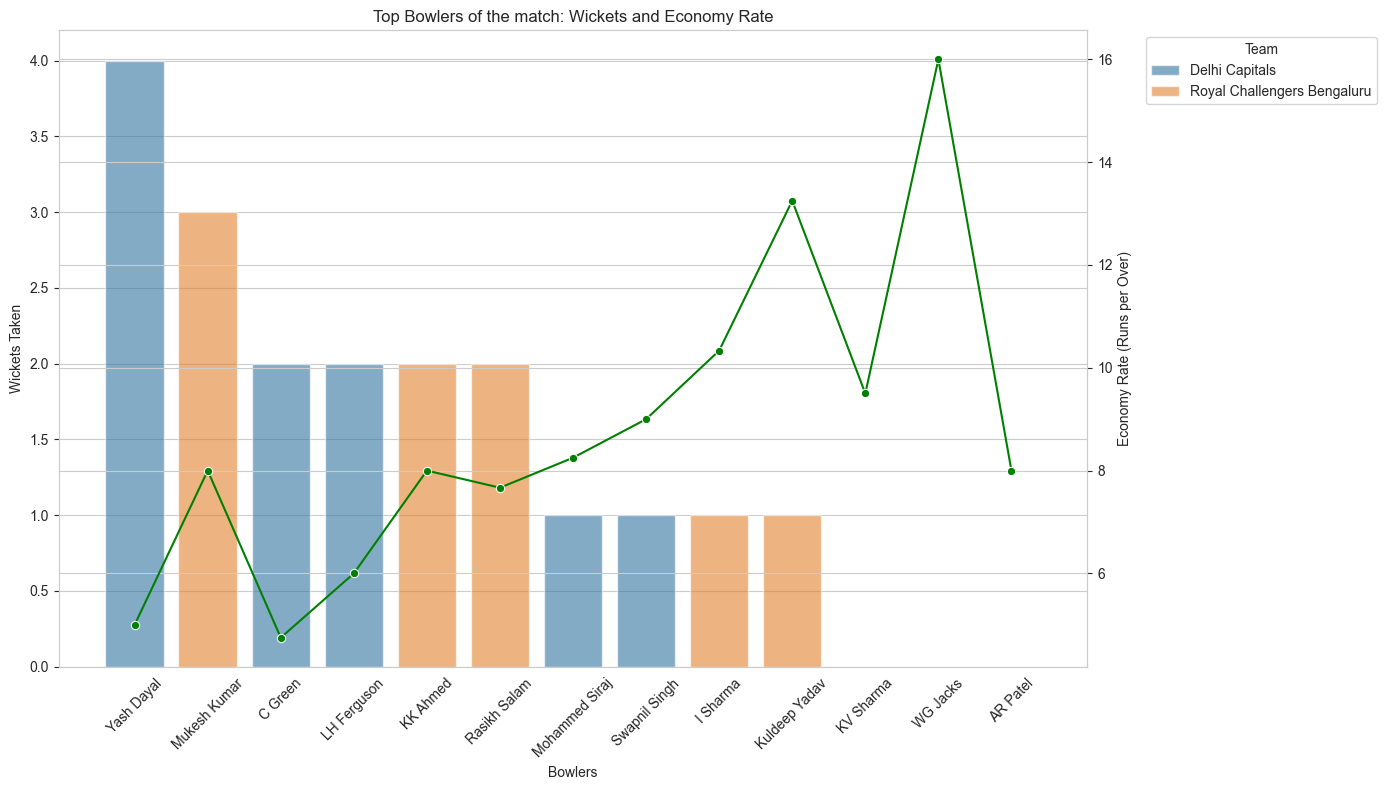

In [19]:
bowling_stats_sorted['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({
    'runs_total': 'sum', 
    'wickets_taken': 'sum', 
    'over': 'nunique'
}).reset_index()

bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowlers')
ax1.set_title('Top Bowlers of the match: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='green')
ax2.set_ylabel('Economy Rate (Runs per Over)')

plt.tight_layout()
plt.show()

* The graph shows that DC had great bowlers who took more wickets keeping less economy rate.

## Dismissals occured in the match


In [20]:
dismissal_types = deliveries_df['wicket_kind'].dropna().value_counts()


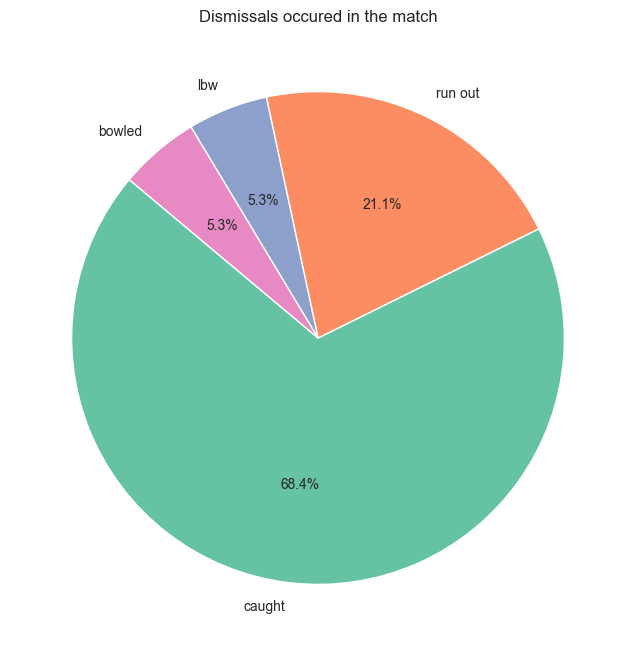

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Dismissals occured in the match')
plt.show()

* The Pie Chart shows that most wickets were taken by caught and run out.

## Phase analysis - Runs and Wickets

In [22]:
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

In [23]:
deliveries_df['phase'] = deliveries_df['over'].apply(classify_phase)

phase_analysis = deliveries_df.groupby(['team', 'phase']).agg({
    'runs_total': 'sum', 
    'wickets_taken': 'sum', 
    'over': 'count'
}).rename(columns={'over': 'balls'}).reset_index()

phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

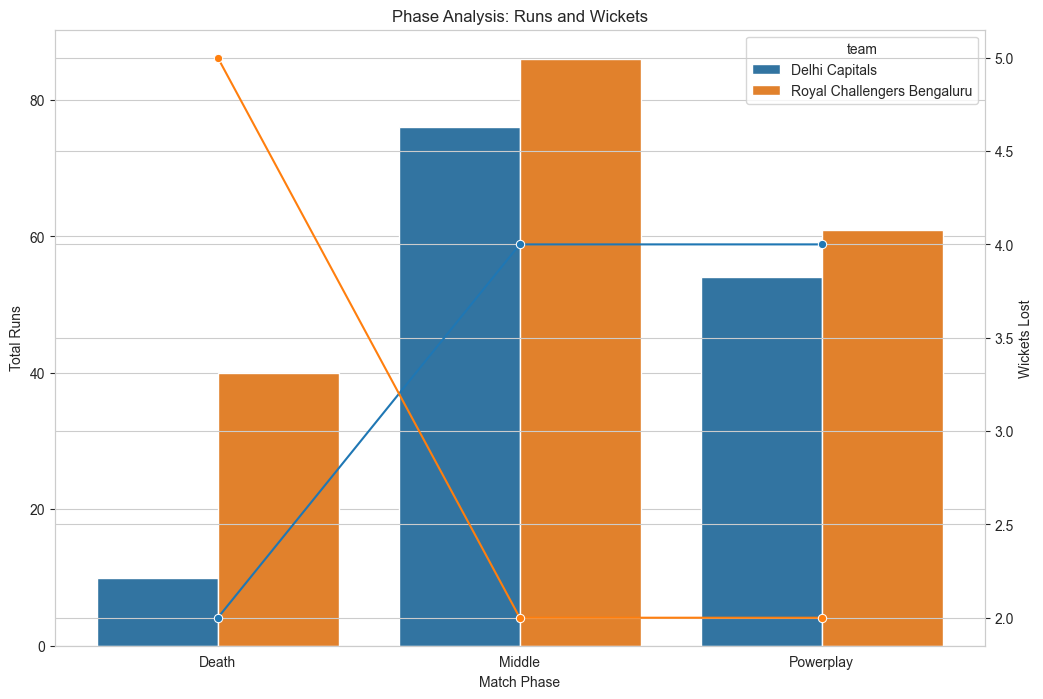

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

* Powerplay Phase: DC lost more wickets than RCB in this phase as indicated by the blue line.
* Middle Phase: This phase shows the highest run-scoring for both teams, with RCB scoring slightly more than DC.
* Death Phase: RCB had the highest run rate in this phase, with 12.5 runs per ball. Wickets lost by RCB increased significantly in this phase, marked by the orange line peaking near 4.5, indicating a possible collapse or aggressive batting.

## Turning Points of the Match - cumulative run rate comparison and wickets

In [ ]:
deliveries_df['cumulative_runs'] = deliveries_df.groupby('team')['runs_total'].cumsum()
deliveries_df['cumulative_wickets'] = deliveries_df.groupby('team')['wickets_taken'].cumsum()

rcb_deliveries = deliveries_df[deliveries_df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = deliveries_df[deliveries_df['team'] == 'Delhi Capitals']

rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

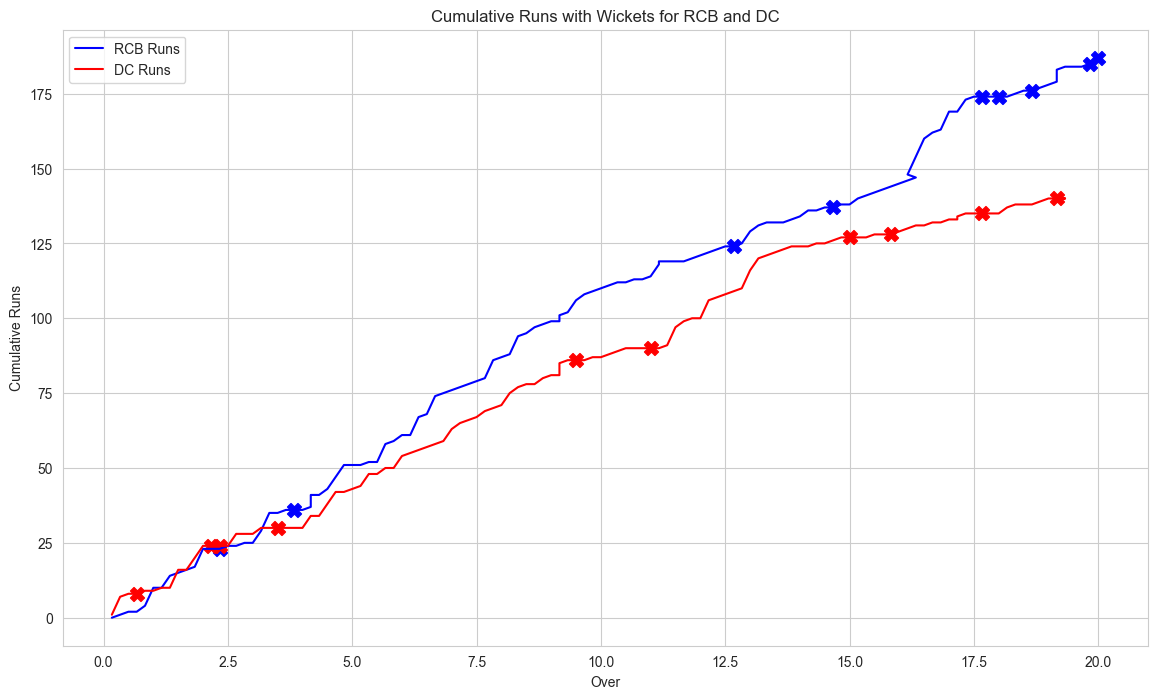

In [26]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

* The points where wickets are lost are crucial. Despite wickets, RCB’s run line does not show any drastic downturns, suggesting effective recovery by subsequent batters.
* RCB’s ability to keep the run rate up despite losing wickets might indicate deeper batting strength or successful innings pacing strategies. In contrast, DC, while also increasing their score, does so at a less steep rate, possibly indicating fewer big overs.

## Run Rate for each Over

In [27]:
per_over_stats = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6) 

rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']


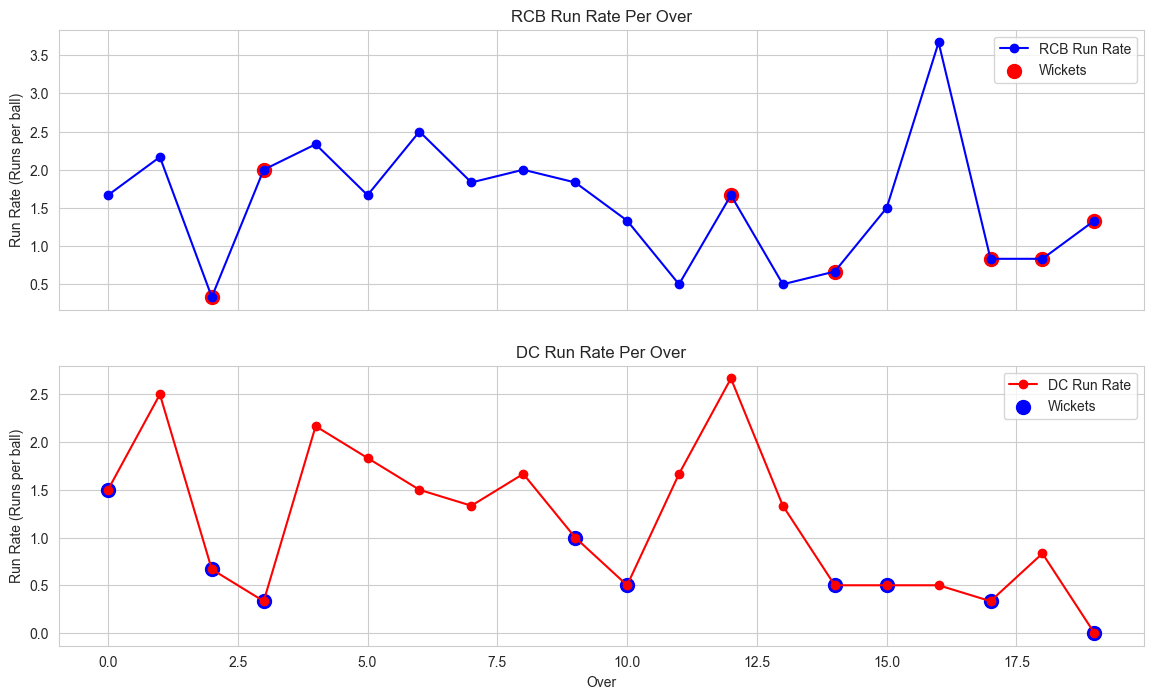

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()

* RCB’s run rate shows significant fluctuations, peaking at around 3.5 runs per ball towards the end of the innings. The presence of wicket markers (red circles) indicates that wickets were taken during overs where the run rate was generally lower, which is typical as wickets tend to disrupt batting flow.
* DC’s run rate starts strong but sees a sharp decline after the initial overs, stabilizing somewhat in the middle before another peak and subsequent fall towards the end. Wickets (blue circles) are taken in overs where the run rate drops, suggesting effective bowling from RCB during these times.